# Proyecto 1 | Inteligencia Artificial
## Integrantes:
- **César Jiménez Salazar** - 2021052709
- **Maynor Martínez Hernández** - 2021052792
- **Fernanda Murillo Mena** - 2021077803

## Descripción
Este notebook corresponde al análisis de pruebas realizadas para el modelo de KNN.


## Pima Indians Diabetes Database
Actualemente se procede hacer los cambios aplicados al dataset, según el análisis previo, por tanto no se explicará el código previo, ya que este fue explciado y detallado en su sección.

#### **Cargar dataset** 

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')


#### **Eliminar filas duplicadas**



In [332]:
# Check for duplicate rows and remove them
print(df_diabetes.duplicated().sum())

0


#### **Imputación de datos**


In [333]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

#### **Remover outliers**


In [334]:
from scipy import stats
import numpy as np
# Calculate Z-scores for each numerical feature in the DataFrame
z_scores = np.abs(stats.zscore(df_diabetes.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers, typically 3
threshold = 3
# Create a boolean DataFrame where Z-scores exceed the threshold
outliers = (z_scores > threshold)
df_no_outliers = df_diabetes[~(outliers).any(axis=1)]

print(f"Original DataFrame size: {df_diabetes.shape}")
print(f"DataFrame size without outliers: {df_no_outliers.shape}")


Original DataFrame size: (768, 9)
DataFrame size without outliers: (719, 9)


### **Dataset Pima Indians Diabetes Database**
En esta sección se procede a realizar el preprocesamiento de datos para el dataset *Pima Indians Diabetes Database*. 

Nótese que cada prueba hace una division de datos en training (80%) y testing (20%). Esto ya que las pruebas consisten en combinaciones del conjunto de datos, que seguirán el siguiente orden:

#### 1. **Dataset Original** 
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 2. **Conjunto de datos original sin la columna de Embarazos** `sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 3. **Conjunto de datos sin outliers** `Sin Outliers`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 4. **Conjunto de datos sin outliers y sin la columna de Embarazos** `Sin outliers y sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización

#### 5. **Sobre muestreo** `Oversampling, sin outliers, sin [Pregnancies]`
- Solo el conjunto tal y como se describe
- Normalización
- Estandarización
    

#### Funciones útiles

In [335]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.xticks([0.5, 1.5], labels, ha='right')
    plt.yticks([0.5, 1.5], labels, va='center')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Define function to calculate weighted score
def weighted_score(accuracy, recall, precision):
    return (0.4 * accuracy) + (0.3 * recall) + (0.3 * precision)

In [336]:
random_state_result = 20

#### Dataset Original
Se utiliza el conjunto de datos en su forma original, sin realizar modificaciones. Esto establece una línea base para entender cómo se comporta el modelo con los datos en su estado más puro.

Original Dataset - Without Scaling
Accuracy: 0.6883116883116883
Precision: 0.5510204081632653
Recall: 0.5094339622641509


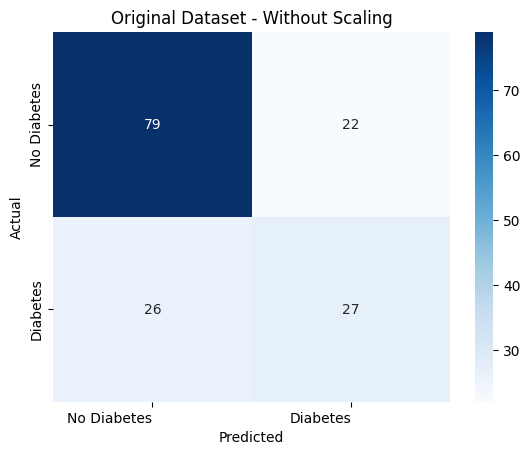

In [337]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

diabeticLabels  = ['No Diabetes', 'Diabetes']
# Split the data into features and target variable
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_result)


# Train the KNN model with the original dataset without scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_original = knn.predict(X_test)

# Calculate and print metrics
print("Original Dataset - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original)}")
print(f"Precision: {precision_score(y_test, y_pred_original)}")
print(f"Recall: {recall_score(y_test, y_pred_original)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Without Scaling",diabeticLabels )


Original Dataset - Normalization
Accuracy: 0.7662337662337663
Precision: 0.6666666666666666
Recall: 0.6415094339622641


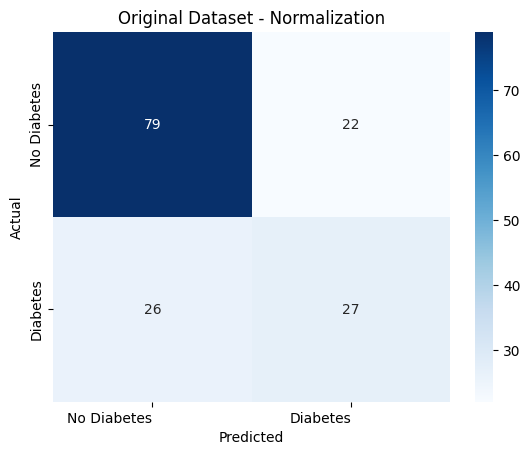

In [338]:

# Normalize the features
scaler_norm = MinMaxScaler()
X_train_normalized = scaler_norm.fit_transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_normalized, y_train)

# Predict on the test set
y_pred_norm = knn.predict(X_test_normalized)

# Calculate and print the metrics
print("Original Dataset - Normalization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_norm)}")
print(f"Precision: {precision_score(y_test, y_pred_norm)}")
print(f"Recall: {recall_score(y_test, y_pred_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Normalization", diabeticLabels)


Original Dataset - Standardization
Accuracy: 0.7662337662337663
Precision: 0.660377358490566
Recall: 0.660377358490566


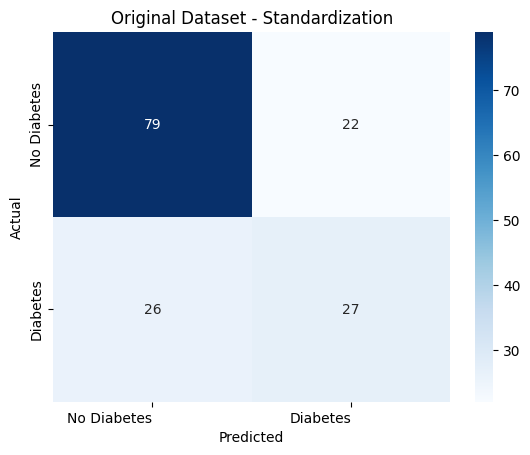

In [339]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler_std = StandardScaler()
X_train_standardized = scaler_std.fit_transform(X_train)
X_test_standardized = scaler_std.transform(X_test)

# Train the KNN model
knn.fit(X_train_standardized, y_train)
y_pred_std = knn.predict(X_test_standardized)

# Calculate and print the metrics
print("Original Dataset - Standardization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_std)}")
print(f"Precision: {precision_score(y_test, y_pred_std)}")
print(f"Recall: {recall_score(y_test, y_pred_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset - Standardization", diabeticLabels)


#### Conjunto de datos original sin la columna de Embarazos `sin [Pregnancies]`
Al conjunto de datos original, se le eliminó la característica relacionada con los embarazos. Ya que se sabe que la característica de embarazos no es relevante para el problema en estudio y este puede sesgar el modelo.

Original Dataset without Pregnancies Column - Without Scaling
Accuracy: 0.7077922077922078
Precision: 0.58
Recall: 0.5471698113207547


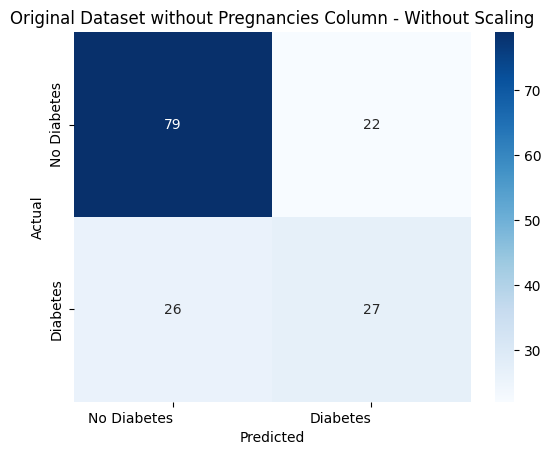

In [340]:
# Drop the 'Pregnancies' column
X_no_preg = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
X_train_no_preg, X_test_no_preg, y_train, y_test = train_test_split(X_no_preg, y, test_size=0.2, random_state=random_state_result)
knn.fit(X_train_no_preg, y_train)
y_pred_no_preg = knn.predict(X_test_no_preg)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Without Scaling" , diabeticLabels)


Original Dataset without Pregnancies Column - Normalization
Accuracy: 0.7337662337662337
Precision: 0.62
Recall: 0.5849056603773585


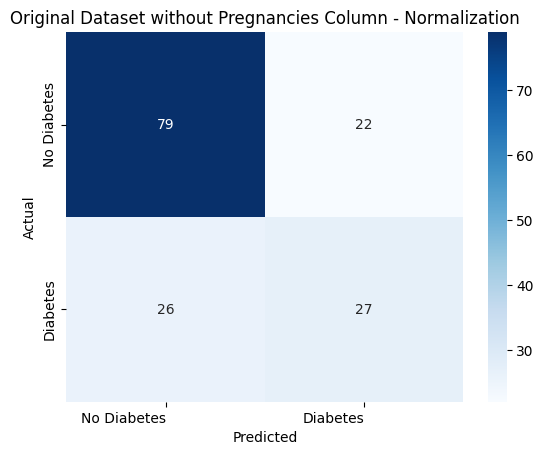

In [341]:

# Normalize the features
X_train_no_preg_normalized = scaler_norm.fit_transform(X_train_no_preg)
X_test_no_preg_normalized = scaler_norm.transform(X_test_no_preg)
knn.fit(X_train_no_preg_normalized, y_train)
y_pred_no_preg_norm = knn.predict(X_test_no_preg_normalized)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Normalization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg_norm)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg_norm)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Normalization"  , diabeticLabels)


Original Dataset without Pregnancies Column - Standardization
Accuracy: 0.7467532467532467
Precision: 0.6346153846153846
Recall: 0.6226415094339622


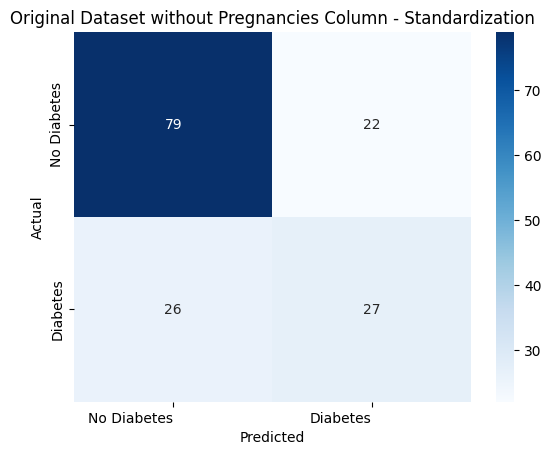

In [342]:
# Standardize the features
X_train_no_preg_standardized = scaler_std.fit_transform(X_train_no_preg)
X_test_no_preg_standardized = scaler_std.transform(X_test_no_preg)
knn.fit(X_train_no_preg_standardized, y_train)
y_pred_no_preg_std = knn.predict(X_test_no_preg_standardized)

# Calculate and print the metrics
print("Original Dataset without Pregnancies Column - Standardization")
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_preg_std)}")
print(f"Precision: {precision_score(y_test, y_pred_no_preg_std)}")
print(f"Recall: {recall_score(y_test, y_pred_no_preg_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Original Dataset without Pregnancies Column - Standardization" , diabeticLabels)


#### Conjunto de datos sin outliers `Sin Outliers`
Se limpian los datos eliminando los valores atípicos (outliers), lo que puede mejorar la precisión del modelo al eliminar anomalías que podrían llevar a sobreajustes o interpretaciones erróneas.

Dataset No Outliers - Without Scaling
Accuracy: 0.7361111111111112
Precision: 0.5526315789473685
Recall: 0.5


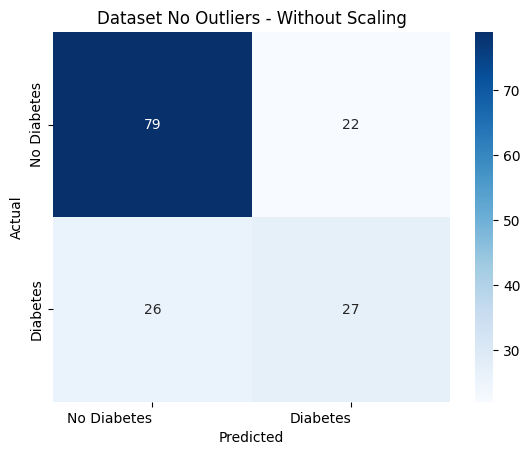

In [343]:
# Split the data without outliers into features and target variable
X_no_outliers = df_no_outliers.drop('Outcome', axis=1)
y_no_outliers = df_no_outliers['Outcome']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=random_state_result)
knn.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = knn.predict(X_test_no_outliers)

# Calculate and print metrics
print("Dataset No Outliers - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Without Scaling" , diabeticLabels)



Dataset No Outliers - Normalization
Accuracy: 0.7638888888888888
Precision: 0.5869565217391305
Recall: 0.6428571428571429


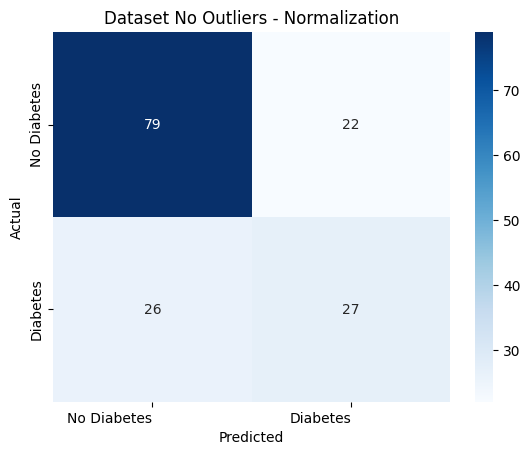

In [344]:

# Normalize the features
X_train_no_outliers_normalized = scaler_norm.fit_transform(X_train_no_outliers)
X_test_no_outliers_normalized = scaler_norm.transform(X_test_no_outliers)
knn.fit(X_train_no_outliers_normalized, y_train_no_outliers)
y_pred_no_outliers_norm = knn.predict(X_test_no_outliers_normalized)

# Calculate and print the metrics
print("Dataset No Outliers - Normalization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Normalization" , diabeticLabels)


Dataset No Outliers - Standardization
Accuracy: 0.7708333333333334
Precision: 0.5918367346938775
Recall: 0.6904761904761905


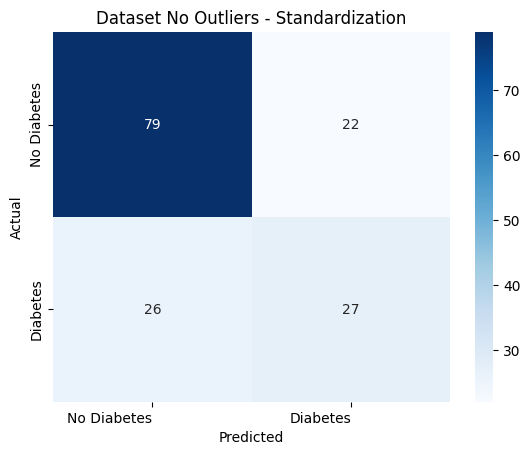

In [345]:
# Standardize the features
X_train_no_outliers_standardized = scaler_std.fit_transform(X_train_no_outliers)
X_test_no_outliers_standardized = scaler_std.transform(X_test_no_outliers)
knn.fit(X_train_no_outliers_standardized, y_train_no_outliers)
y_pred_no_outliers_std = knn.predict(X_test_no_outliers_standardized)

# Calculate and print the metrics
print("Dataset No Outliers - Standardization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_std)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_std)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Standardization" , diabeticLabels)


#### Conjunto de datos sin outliers y sin la columna de Embarazos `Sin outliers y sin [Pregnancies]`
Combina la eliminación de outliers con la exclusión de la característica de embarazos. Este enfoque permite observar la limpieza profunda de datos en el rendimiento del modelo.

Dataset No Outliers without Pregnancies Column - Without Scaling
Accuracy: 0.7361111111111112
Precision: 0.5526315789473685
Recall: 0.5


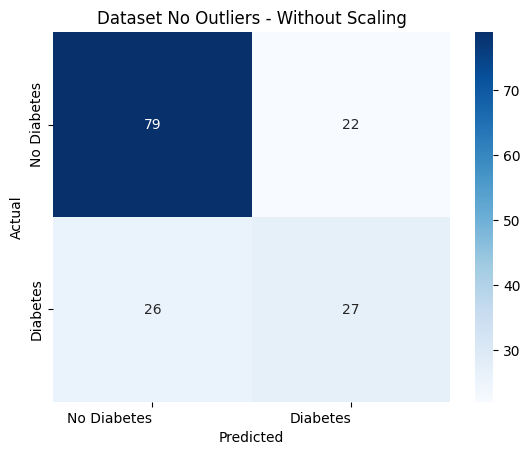

In [346]:
# Drop the 'Pregnancies' column from the dataset without outliers
X_no_outliers_no_preg = df_no_outliers.drop(['Outcome', 'Pregnancies'], axis=1)
X_train_no_outliers_no_preg, X_test_no_outliers_no_preg, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers_no_preg, y_no_outliers, test_size=0.2, random_state=random_state_result)

knn.fit(X_train_no_outliers_no_preg, y_train_no_outliers)
y_pred_no_outliers_no_preg = knn.predict(X_test_no_outliers_no_preg)

# Calculate and print metrics
print("Dataset No Outliers without Pregnancies Column - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers - Without Scaling" ,  diabeticLabels)


Dataset No Outliers without Pregnancies Column - Normalization
Accuracy: 0.7777777777777778
Precision: 0.6136363636363636
Recall: 0.6428571428571429


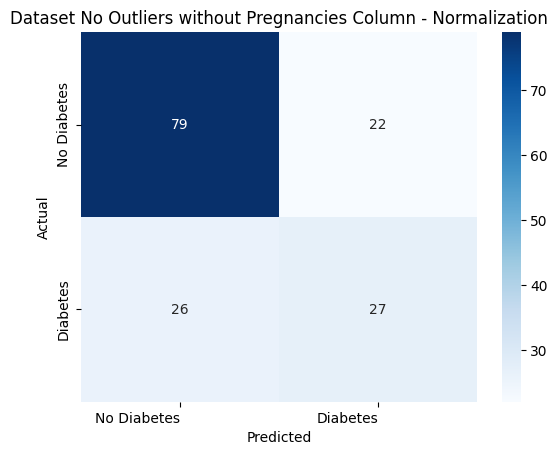

In [347]:
# Normalize the features
X_train_no_outliers_no_preg_normalized = scaler_norm.fit_transform(X_train_no_outliers_no_preg)
X_test_no_outliers_no_preg_normalized = scaler_norm.transform(X_test_no_outliers_no_preg)

knn.fit(X_train_no_outliers_no_preg_normalized, y_train_no_outliers)
y_pred_no_outliers_no_preg_norm = knn.predict(X_test_no_outliers_no_preg_normalized)

# Calculate and print the metrics
print("Dataset No Outliers without Pregnancies Column - Normalization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg_norm)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers without Pregnancies Column - Normalization" , diabeticLabels)


Dataset No Outliers without Pregnancies Column - Standardization
Accuracy: 0.8125
Precision: 0.6666666666666666
Recall: 0.7142857142857143


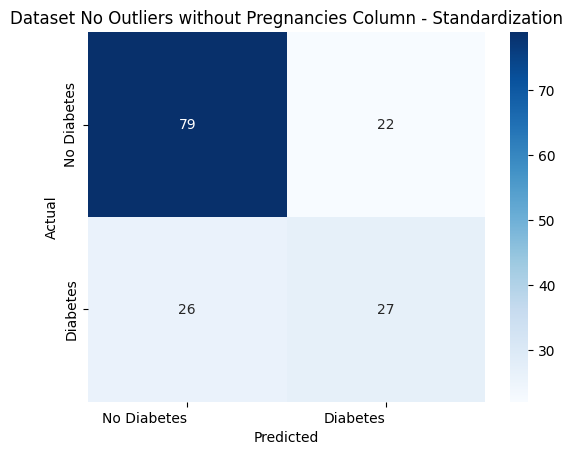

In [348]:
# Standardize the features
X_train_no_outliers_no_preg_standardized = scaler_std.fit_transform(X_train_no_outliers_no_preg)
X_test_no_outliers_no_preg_standardized = scaler_std.transform(X_test_no_outliers_no_preg)

knn.fit(X_train_no_outliers_no_preg_standardized, y_train_no_outliers)
y_pred_no_outliers_no_preg_std = knn.predict(X_test_no_outliers_no_preg_standardized)

# Calculate and print the metrics
print("Dataset No Outliers without Pregnancies Column - Standardization")
print(f"Accuracy: {accuracy_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
print(f"Precision: {precision_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
print(f"Recall: {recall_score(y_test_no_outliers, y_pred_no_outliers_no_preg_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Dataset No Outliers without Pregnancies Column - Standardization" , diabeticLabels)


#### Sobre muestreo `Oversampling (SOMTE), sin outliers, sin [Pregnancies]`
Se aplica técnicas de oversampling para aumentar la representación de las clases minoritarias en el conjunto de datos

Oversampled Dataset - Without Scaling
Accuracy: 0.7120418848167539
Precision: 0.6391752577319587
Recall: 0.7560975609756098


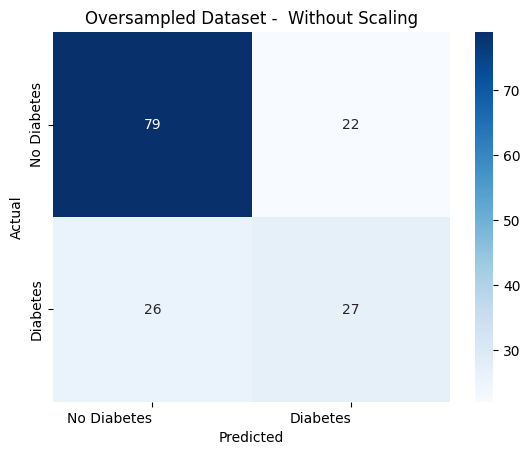

In [349]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=random_state_result)
X_smote, y_smote = smote.fit_resample(X_no_outliers_no_preg, y_no_outliers)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=random_state_result)
# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
y_pred_smote = knn.predict(X_test_smote)

print("Oversampled Dataset - Without Scaling")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_smote)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_smote)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_smote)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled Dataset -  Without Scaling" , diabeticLabels)


Oversampled No Outliers Dataset - Normalization
Accuracy: 0.743455497382199
Precision: 0.6701030927835051
Recall: 0.7926829268292683


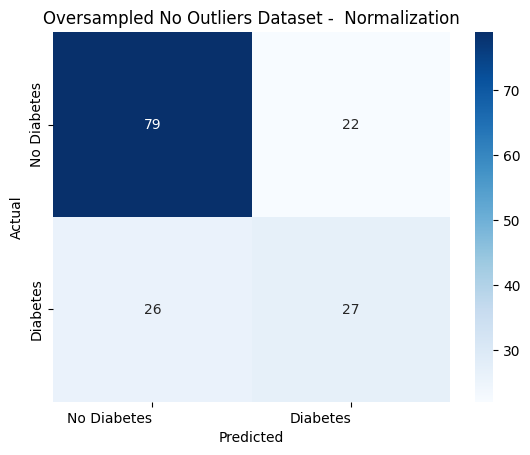

In [350]:

# Normalize the features
X_train_no_outliers_smote_no_preg_norm = scaler_norm.fit_transform(X_train_smote)
X_test_no_outliers_smote_no_preg_norm = scaler_norm.transform(X_test_smote)


knn.fit(X_train_no_outliers_smote_no_preg_norm, y_train_smote)
y_pred_no_outliers_smote_std = knn.predict(X_test_no_outliers_smote_no_preg_norm)

print("Oversampled No Outliers Dataset - Normalization")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_no_outliers_smote_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled No Outliers Dataset -  Normalization" , diabeticLabels)


Oversampled No Outliers Dataset - Standardization
Accuracy: 0.7486910994764397
Precision: 0.673469387755102
Recall: 0.8048780487804879


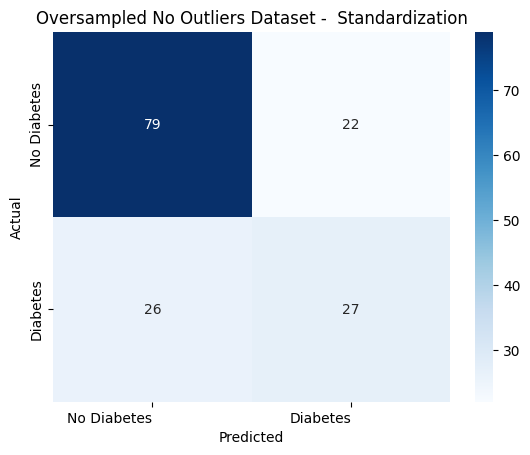

In [351]:

scaler_std = StandardScaler()
X_train_no_outliers_smote_standardized = scaler_std.fit_transform(X_train_smote)
X_test_no_outliers_smote_standardized = scaler_std.transform(X_test_smote)

knn.fit(X_train_no_outliers_smote_standardized, y_train_smote)
y_pred_no_outliers_smote_std = knn.predict(X_test_no_outliers_smote_standardized)

print("Oversampled No Outliers Dataset - Standardization")
print(f"Accuracy: {accuracy_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Precision: {precision_score(y_test_smote, y_pred_no_outliers_smote_std)}")
print(f"Recall: {recall_score(y_test_smote, y_pred_no_outliers_smote_std)}")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_original), "Oversampled No Outliers Dataset -  Standardization" , diabeticLabels)


#### Análisis más profundo
Una vez aplicado el las pruebas individuales según el dataset, se puede ver concluir que el mejor resultado es `Oversample No Outliers - Normalization`, sin emabrgo el modelo de entrenamiento tiene un hiperparámetros que se debería probar en este caso el valor de `k`. Por tanto una vez hecha las pruebas para mútilples K, también se hará la pruebas cambiando el `random_seed` y con esto obtener los 5 mejores resultados según la distribución de pesos `weight_score`

Original Dataset            - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Without Scaling: - AUC=0.77, Accuracy=0.73, Precision=0.64, Recall=0.53
Original Dataset            - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'} - Normalization  : - AUC=0.79, Accuracy=0.73, Precision=0.62, Recall=0.55
Original Dataset            - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'} - Standardization: - AUC=0.79, Accuracy=0.77, Precision=0.69, Recall=0.58
Orig Dataset no Preg        - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'} - Without Scaling: - AUC=0.79, Accuracy=0.75, Precision=0.66, Recall=0.55
Orig Dataset no Preg        - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} - Normalization  : - AUC=0.81, Accuracy=0.79, Precision=0.72, Recall=0.62
Orig Dataset no Preg        - Random=20 - Params={'metric':

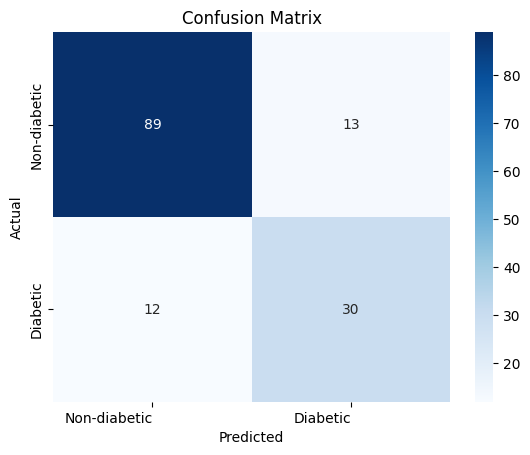

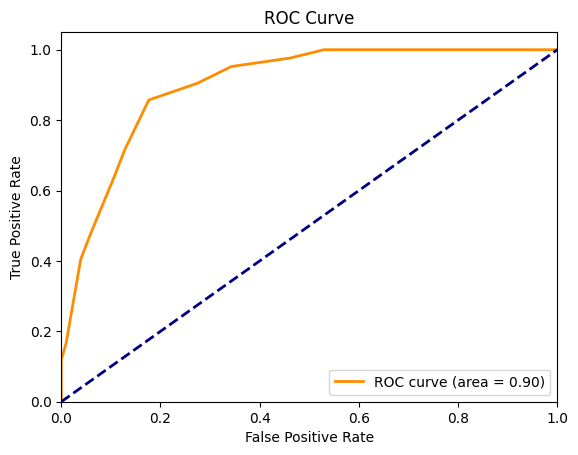

Dataset No Outliers no Preg - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} - Standardization: AUC=0.89, Accuracy=0.78, Precision=0.63, Recall=0.62


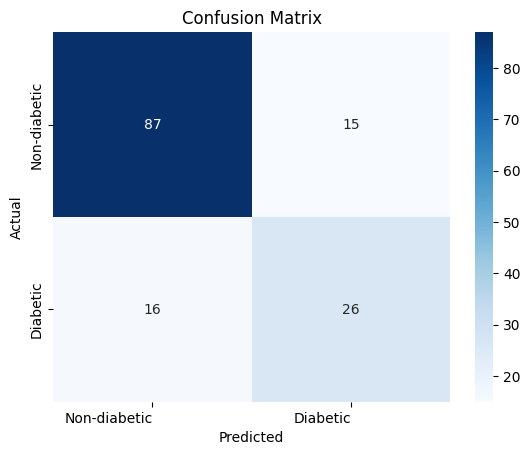

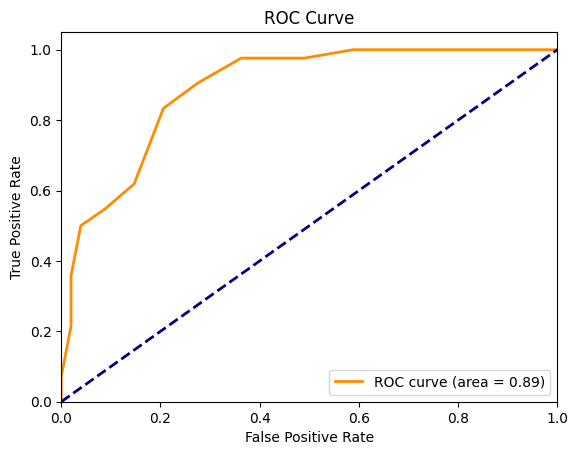

Dataset No Outliers         - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'} - Normalization  : AUC=0.87, Accuracy=0.81, Precision=0.66, Recall=0.69


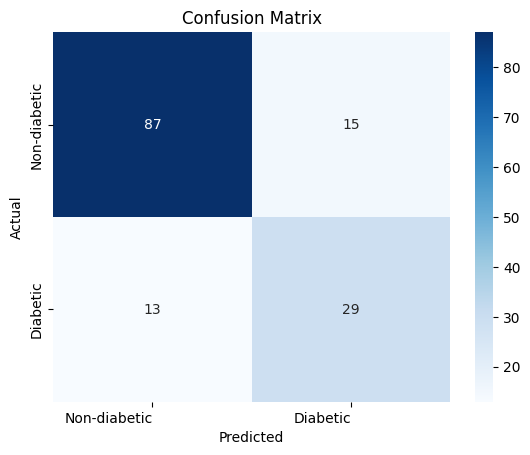

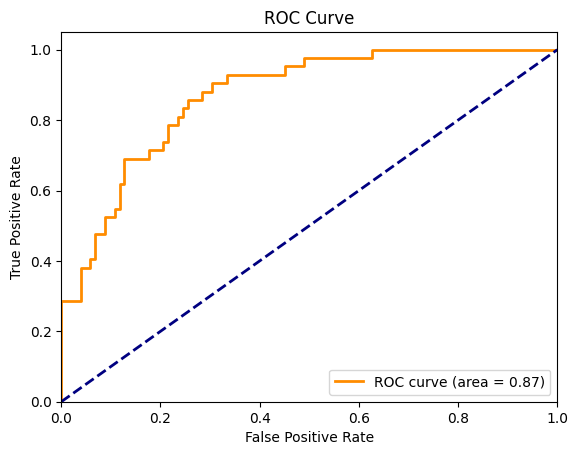

Dataset No Outliers         - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.87, Accuracy=0.80, Precision=0.65, Recall=0.67


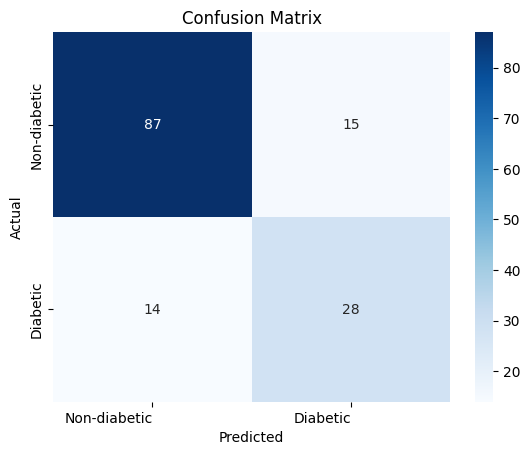

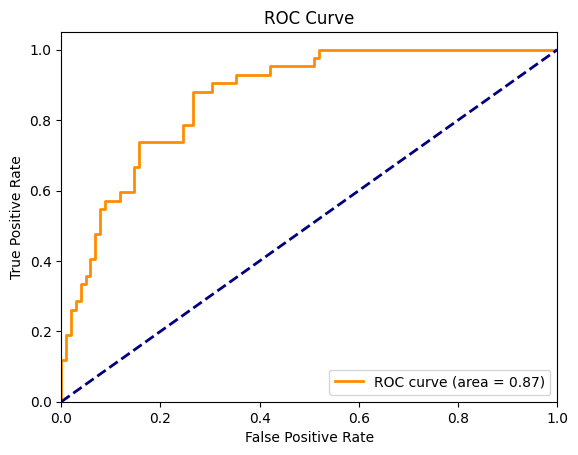

Oversampled Dataset         - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'} - Normalization  : AUC=0.86, Accuracy=0.75, Precision=0.67, Recall=0.85


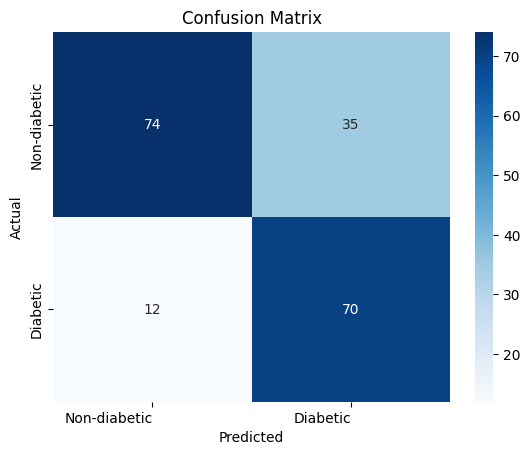

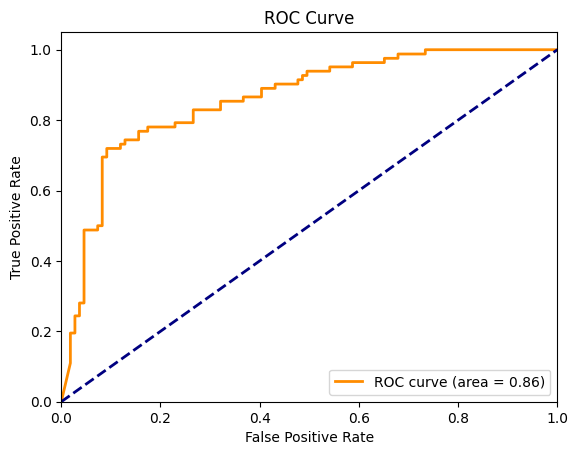

Oversampled Dataset         - Random=20 - Params={'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.86, Accuracy=0.75, Precision=0.66, Recall=0.84


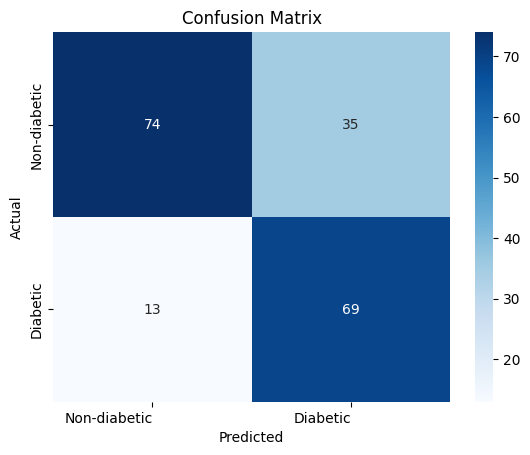

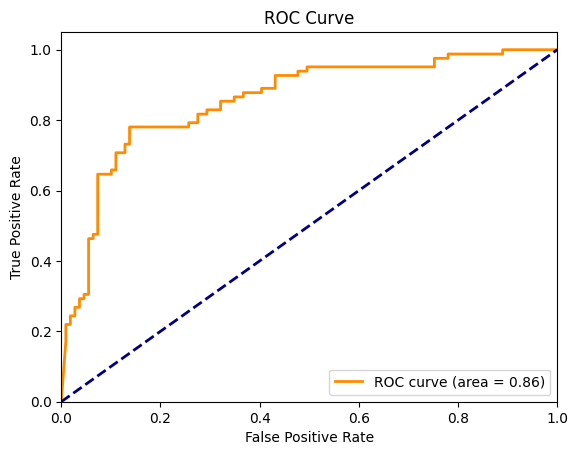

Dataset No Outliers         - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'} - Without Scaling: AUC=0.85, Accuracy=0.78, Precision=0.62, Recall=0.62


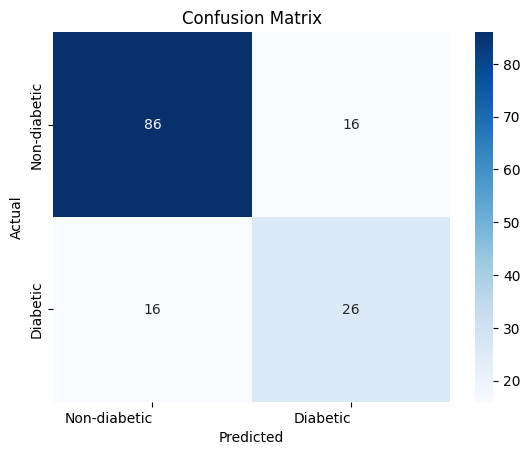

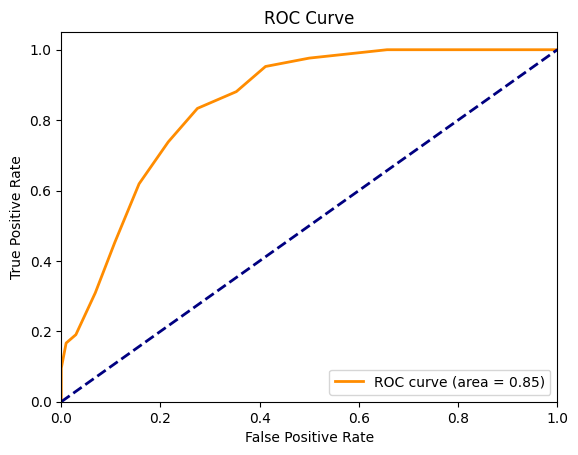

Dataset No Outliers no Preg - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} - Without Scaling: AUC=0.84, Accuracy=0.76, Precision=0.58, Recall=0.60


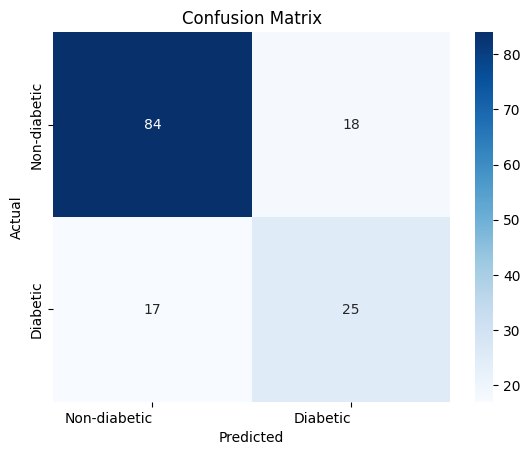

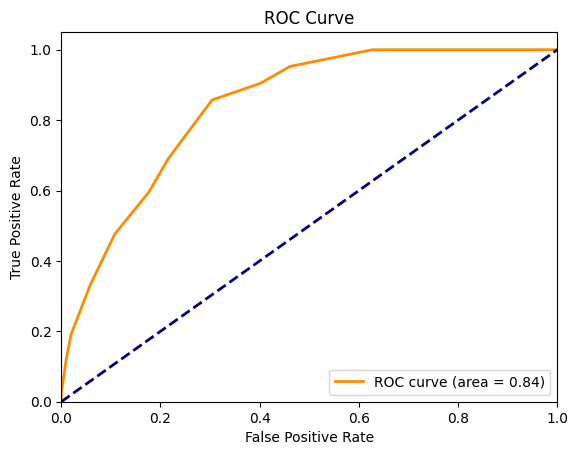

Oversampled Dataset         - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Without Scaling: AUC=0.83, Accuracy=0.72, Precision=0.63, Recall=0.84


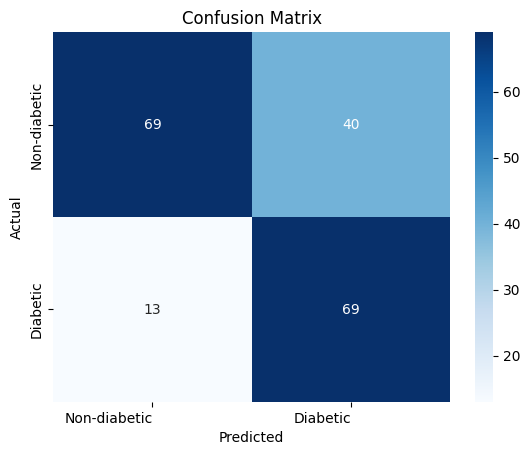

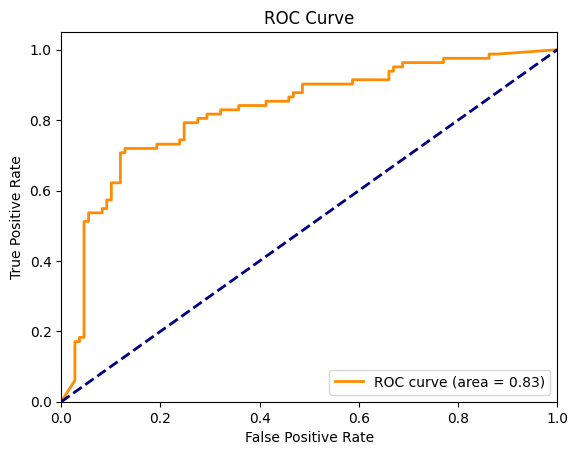

Orig Dataset no Preg        - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} - Normalization  : AUC=0.81, Accuracy=0.79, Precision=0.72, Recall=0.62


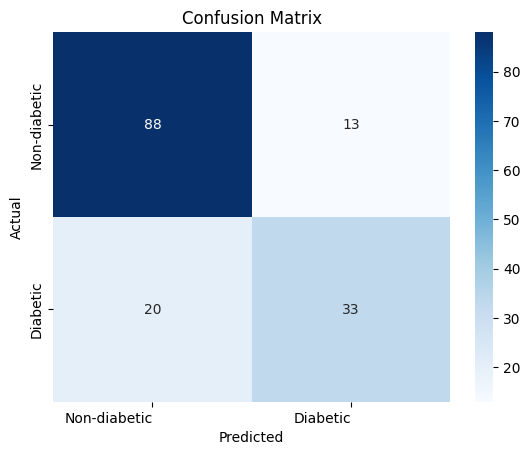

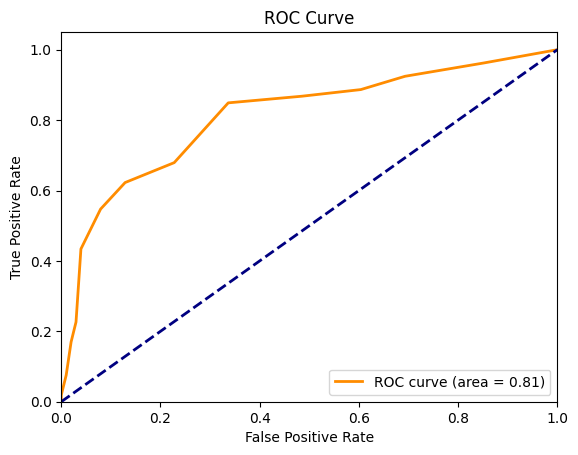

In [352]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialization of scalers
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

# Extended grid of parameters to search
param_grid_extended = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definitions of the datasets for each test scenario
datasets_diabetes = [
    ('Original Dataset', X, y),
    ('Orig Dataset no Preg', X_no_preg, y),
    ('Dataset No Outliers', X_no_outliers, y_no_outliers),
    ('Dataset No Outliers no Preg', X_no_outliers_no_preg, y_no_outliers),
    ('Oversampled Dataset', X_smote, y_smote)
]

# Dictionary to store the best tests based on AUC and include metrics for confusion matrix
best_tests = {}

random_state_result_knn = [20]

for random_knn in random_state_result_knn:
    for test_name, X, y in datasets_diabetes:
        # Splitting the dataset for each random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_knn)

        # Loop through different data preprocessing techniques
        for scale_method, scaler in [('Without Scaling', None), 
                                    ('Normalization', scaler_norm), 
                                    ('Standardization', scaler_std)]:
            
            # Apply scaling if needed
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
            else:
                X_train_scaled = X_train
                X_test_scaled = X_test

            # Setup the grid search
            knn = KNeighborsClassifier()
            grid_search = GridSearchCV(knn, param_grid_extended, cv=5, scoring='roc_auc')
            grid_search.fit(X_train_scaled, y_train)
            best_params = grid_search.best_params_

            # Train KNN with the best parameters
            knn_best = KNeighborsClassifier(**best_params)
            knn_best.fit(X_train_scaled, y_train)
            y_pred = knn_best.predict(X_test_scaled)
            fpr, tpr, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
            roc_auc = auc(fpr, tpr)
            cm = confusion_matrix(y_test, y_pred)
            
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='binary')
            recall = recall_score(y_test, y_pred, average='binary')

            # Storing results
            test_key = f"{test_name:27} - Random={random_knn} - Params={best_params} - {scale_method:15}"
            best_tests[test_key] = {
                'confusion_matrix': cm,
                'fpr': fpr, 
                'tpr': tpr,
                'roc_auc': roc_auc,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall
            }

            print(f"{test_key}: - AUC={roc_auc:.2f}, Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")


# Identify the top 5 tests based on AUC
top_10_tests = sorted(best_tests.keys(), key=lambda x: best_tests[x]['roc_auc'], reverse=True)[:10]
print("\nTop 10 tests based on AUC:")
for test in top_10_tests:
    auc_score = best_tests[test]['roc_auc']
    accuracy = best_tests[test]['accuracy']
    precision = best_tests[test]['precision']
    recall = best_tests[test]['recall']
    print(f"{test}: AUC={auc_score:.2f}, Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plot_confusion_matrix(best_tests[test]['confusion_matrix'], f"Confusion Matrix", ['Non-diabetic', 'Diabetic'])
    plot_roc_curve(best_tests[test]['fpr'], best_tests[test]['tpr'], best_tests[test]['roc_auc'], f"ROC Curve")


## Heart Failure Prediction Dataset
Se procederá a realizar las mismas pruebas aplicadas al dataset de Pima Indians Diabetes, adaptándolas al dataset de Heart Failure Prediction.


#### **Cargar dataset** 

In [353]:
# Load dataset
df_heart = pd.read_csv('heart.csv')

#### **Eliminar filas duplicadas**

In [354]:
# Check for duplicate rows and remove them
print(df_heart.duplicated().sum())

0


#### **Label Enconding**

In [355]:
# Label codification 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])
df_heart['ChestPainType'] = le.fit_transform(df_heart['ChestPainType'])
df_heart['RestingECG'] = le.fit_transform(df_heart['RestingECG'])
df_heart['ST_Slope'] = le.fit_transform(df_heart['ST_Slope'])

#### **Imputación de datos**

In [356]:
df_heart['Cholesterol'] = df_heart['Cholesterol'].replace(0, np.nan)
df_heart.fillna(df_heart.mean(), inplace=True)

#### **Remover outliers**

In [357]:
# Calculate Z-scores for each numerical feature in the DataFrame
z_scores = np.abs(stats.zscore(df_heart.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers, typically 3
threshold = 3
# Create a boolean DataFrame where Z-scores exceed the threshold
outliers = (z_scores > threshold)
df_heart_no_outliers = df_heart[~(outliers).any(axis=1)]

print(f"Original DataFrame size: {df_heart.shape}")
print(f"DataFrame size without outliers: {df_heart_no_outliers.shape}")

Original DataFrame size: (918, 12)
DataFrame size without outliers: (890, 12)


### **Heart Failure Prediction Dataset**
Este segmento aplica modelos de entrenamiento al dataset de Heart Failure Prediction, adaptando pruebas del dataset de Pima Indians Diabetes. Se dividirá en conjuntos de entrenamiento (80%) y prueba (20%), explorando distintas configuraciones:

1. **Dataset Original**: Sin cambios.
2. **Dataset sin las columnas 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'**: Eliminación de estas columnas, no 'Cholesterol'.
3. **Dataset sin Outliers**: Remoción de outliers.
4. **Dataset sin Outliers y sin las columnas específicas**: Combinación de ambas exclusiones.
5. **Oversampling**: Aplicado al dataset ajustado, equilibrando clases.

Cada configuración será evaluada sin escalar (without scaling), con normalización y con estandarización.

### **Automatización de pruebas en el Heart Failure Prediction Dataset**
Se optó por un enfoque de fuerza bruta para evaluar automáticamente múltiples configuraciones y transformaciones de datos. Esto permite identificar de manera eficiente las configuraciones que ofrecen los mejores resultados con el modelo KNN, adaptadas a las peculiaridades del dataset de Heart Failure Prediction.


#### **Dvisión de los datos en entrenamiento y prueba**

In [358]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
random_state_result_for_heart = 20
# Dividing the original dataset
X_heart = df_heart.drop('HeartDisease', axis=1)
y_heart = df_heart['HeartDisease']
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=random_state_result_for_heart)

# Dividing the dataset without columns 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'
X_heart_reduced = df_heart.drop(['HeartDisease', 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'], axis=1)
y_heart_reduced = df_heart['HeartDisease']
X_train_heart_reduced, X_test_heart_reduced, y_train_heart_reduced, y_test_heart_reduced = train_test_split(X_heart_reduced, y_heart_reduced, test_size=0.2, random_state=random_state_result_for_heart)

# Dividing the dataset without outliers
X_heart_no_outliers = df_heart_no_outliers.drop('HeartDisease', axis=1)
y_heart_no_outliers = df_heart_no_outliers['HeartDisease']
X_train_heart_no_outliers, X_test_heart_no_outliers, y_train_heart_no_outliers, y_test_heart_no_outliers = train_test_split(X_heart_no_outliers, y_heart_no_outliers, test_size=0.2, random_state=random_state_result_for_heart)

# Dividing the dataset without outliers and without columns 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'
X_heart_no_outliers_reduced = df_heart_no_outliers.drop(['HeartDisease', 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'], axis=1)
y_heart_no_outliers_reduced = df_heart_no_outliers['HeartDisease']
X_train_heart_no_outliers_reduced, X_test_heart_no_outliers_reduced, y_train_heart_no_outliers_reduced, y_test_heart_no_outliers_reduced = train_test_split(X_heart_no_outliers_reduced, y_heart_no_outliers_reduced, test_size=0.2, random_state=random_state_result_for_heart)

# Applying SMOTE technique to the dataset without outliers and without columns 'Sex', 'ExerciseAngina', 'RestingECG', 'ST_Slope'
smote = SMOTE(random_state=42)
X_heart_smote, y_heart_smote = smote.fit_resample(X_heart_no_outliers_reduced, y_heart_no_outliers_reduced)
X_train_heart_smote, X_test_heart_smote, y_train_heart_smote, y_test_heart_smote = train_test_split(X_heart_smote, y_heart_smote, test_size=0.2, random_state=random_state_result_for_heart)


#### **Script de Fuerza Bruta**

Heart Original Dataset                     - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'} - Without Scaling: - AUC=0.84, Accuracy=0.79, Precision=0.79, Recall=0.85
Heart Original Dataset                     - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'} - Normalization  : - AUC=0.94, Accuracy=0.88, Precision=0.88, Recall=0.89
Heart Original Dataset                     - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'} - Standardization: - AUC=0.94, Accuracy=0.88, Precision=0.88, Recall=0.90
Heart Dataset Reduced Features             - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Without Scaling: - AUC=0.83, Accuracy=0.77, Precision=0.76, Recall=0.83
Heart Dataset Reduced Features             - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Normalization  : - AUC=0.90, Accuracy=0.80, Precision=

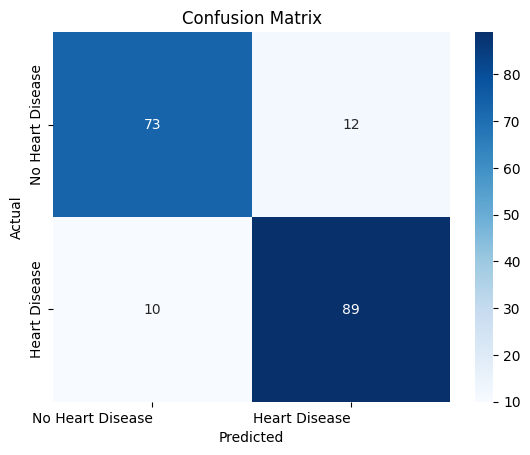

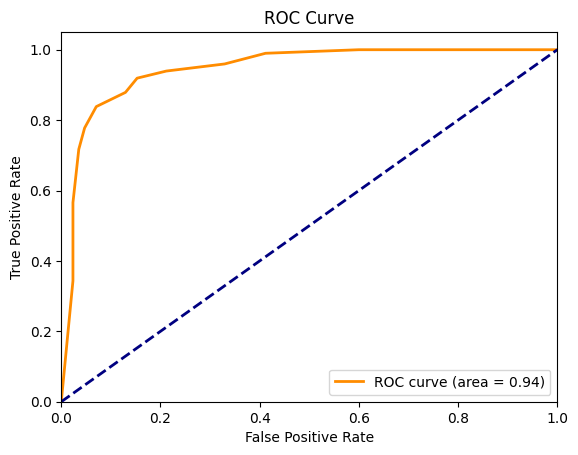

Heart Original Dataset                     - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'} - Normalization  : AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


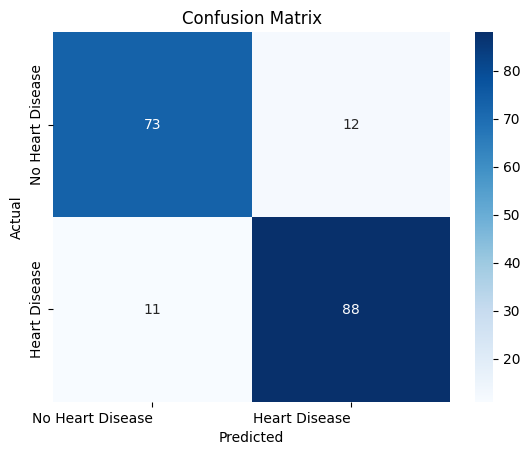

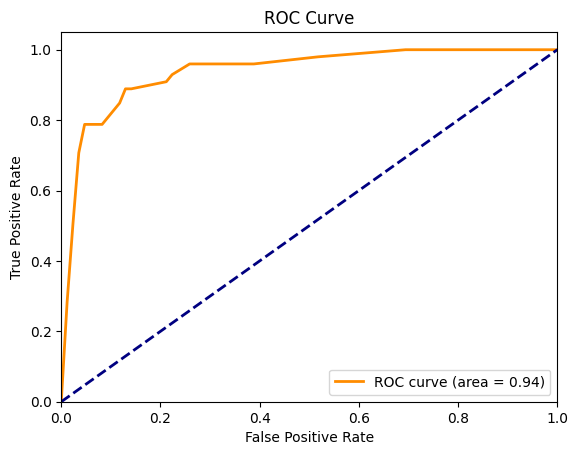

Heart Dataset No Outliers                  - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


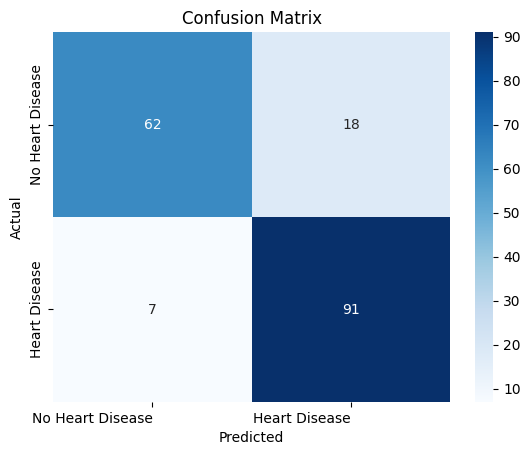

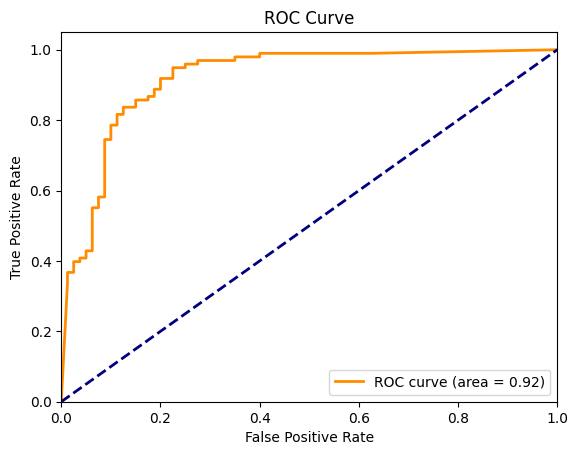

Heart Dataset No Outliers                  - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Normalization  : AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


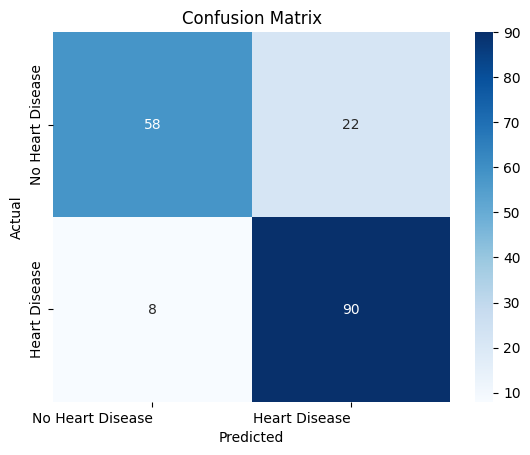

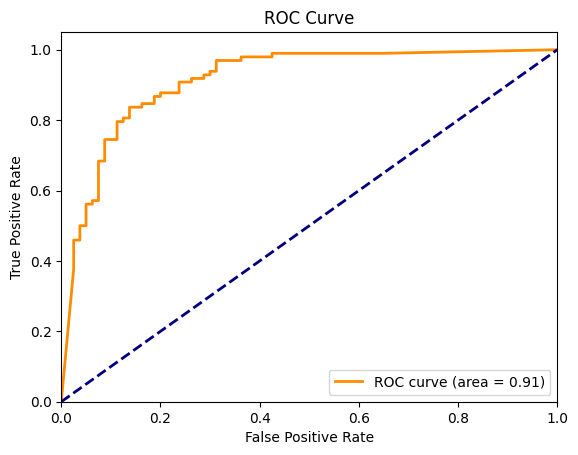

Heart Dataset Reduced Features             - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


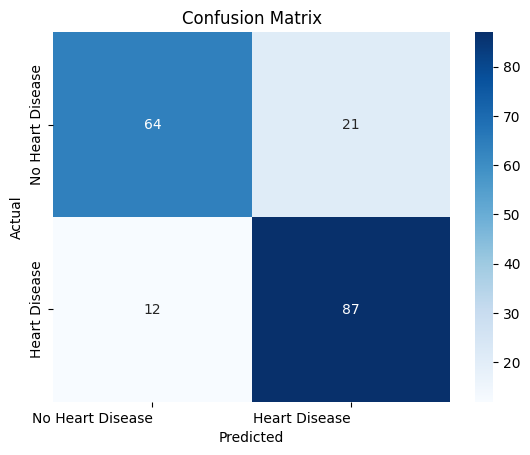

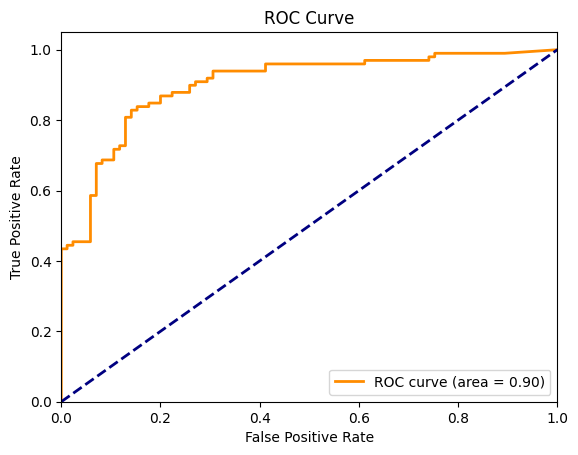

Heart Dataset Reduced Features             - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Normalization  : AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


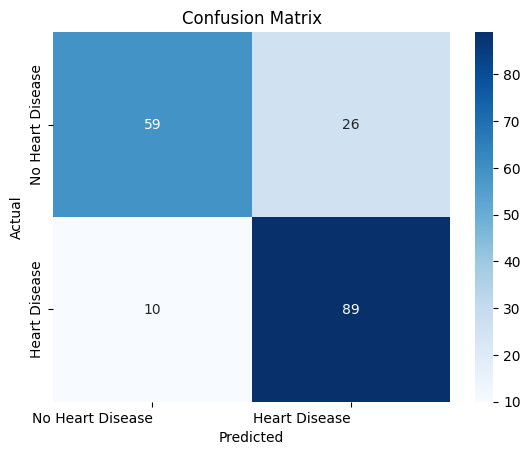

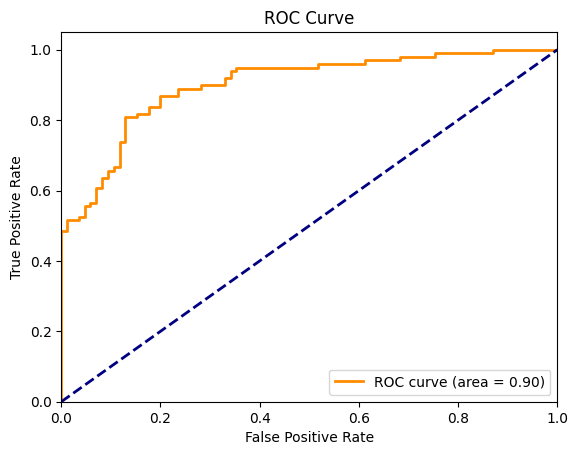

Heart Oversampled Dataset                  - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


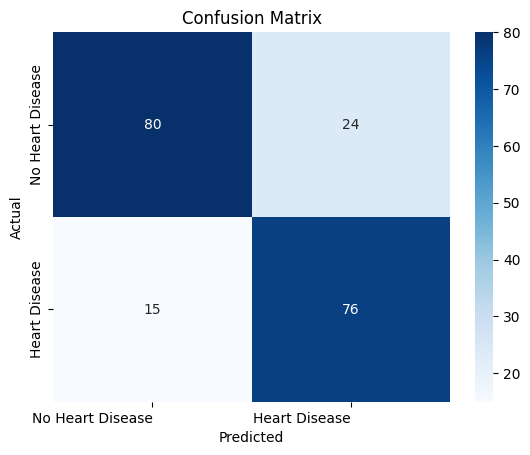

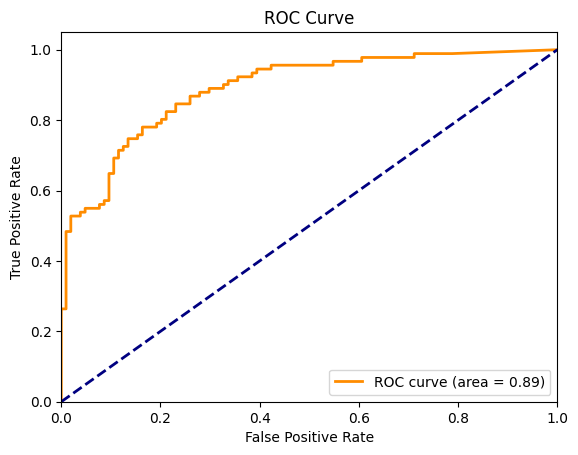

Heart Oversampled Dataset                  - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'} - Normalization  : AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


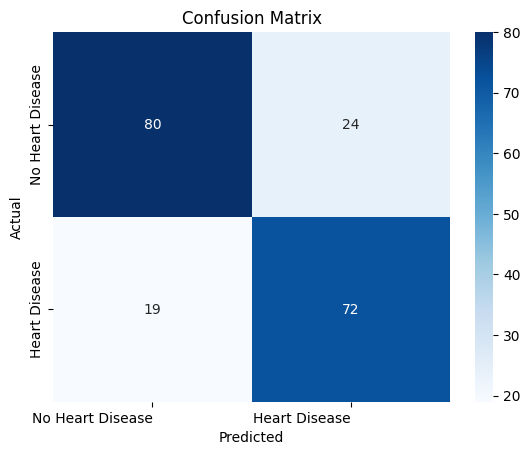

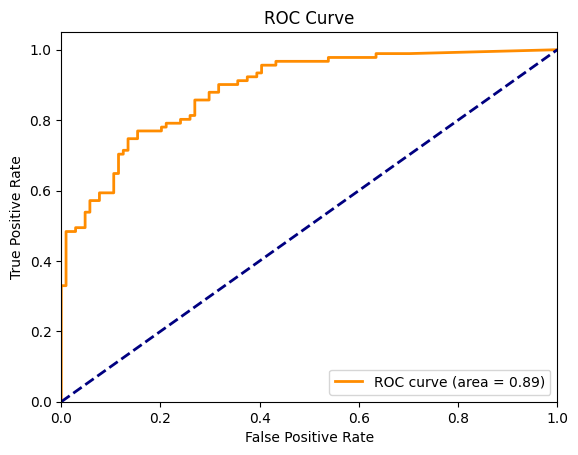

Heart Dataset No Outliers Reduced Features - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'} - Standardization: AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


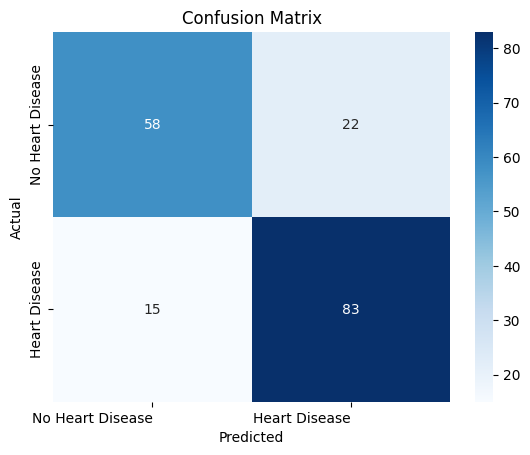

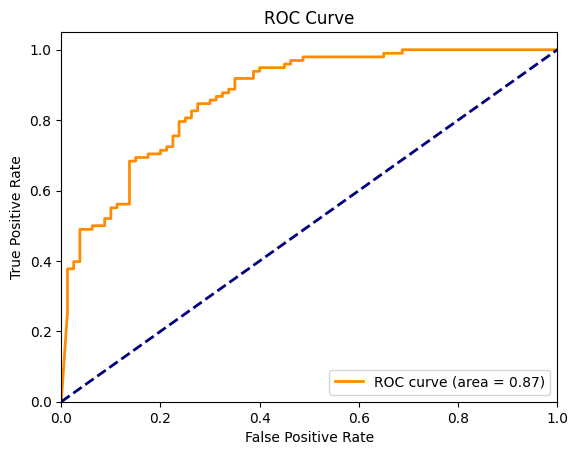

Heart Dataset No Outliers Reduced Features - Random=20 - Params={'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'} - Normalization  : AUC=0.89, Accuracy=0.80, Precision=0.76, Recall=0.84


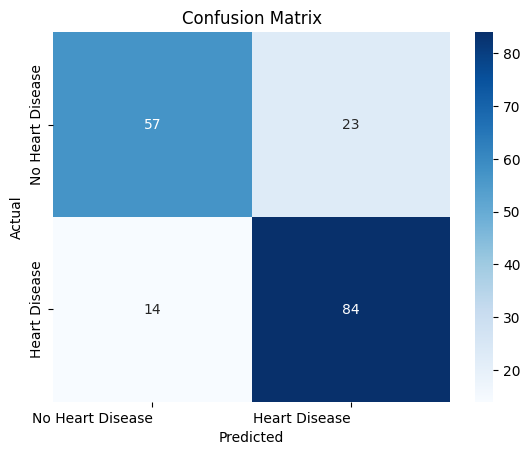

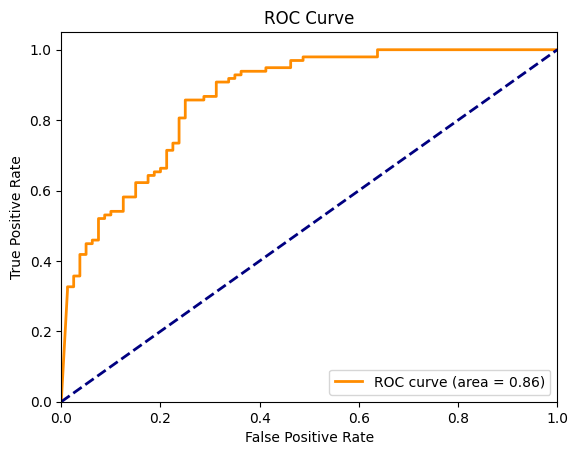

In [359]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialization of scalers
scaler_norm_heart = MinMaxScaler()
scaler_std_heart = StandardScaler()

# Extended grid of parameters to search
param_grid_extended = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Definitions of the datasets for each test scenario
datasets_heart = [
    ('Heart Original Dataset', X_heart, y_heart),
    ('Heart Dataset Reduced Features', X_heart_reduced, y_heart_reduced),
    ('Heart Dataset No Outliers', X_heart_no_outliers, y_heart_no_outliers),
    ('Heart Dataset No Outliers Reduced Features', X_heart_no_outliers_reduced, y_heart_no_outliers_reduced),
    ('Heart Oversampled Dataset', X_heart_smote, y_heart_smote)
]

# Dictionary to store the best tests based on AUC and include metrics for confusion matrix
best_tests_heart = {}

random_state_result_heart = [20]

for random_heart in random_state_result_heart:
    for test_name, X, y in datasets_heart:
        # Splitting the dataset for each random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_heart)

        # Loop through different data preprocessing techniques
        for scale_method, scaler in [('Without Scaling', None), 
                                    ('Normalization', scaler_norm_heart), 
                                    ('Standardization', scaler_std_heart)]:
            
            # Apply scaling if needed
            if scaler:
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
            else:
                X_train_scaled = X_train
                X_test_scaled = X_test

            # Setup the grid search
            knn = KNeighborsClassifier()
            grid_search = GridSearchCV(knn, param_grid_extended, cv=5, scoring='roc_auc')
            grid_search.fit(X_train_scaled, y_train)
            best_params = grid_search.best_params_

            # Train KNN with the best parameters
            knn_best = KNeighborsClassifier(**best_params)
            knn_best.fit(X_train_scaled, y_train)
            y_pred_heart = knn_best.predict(X_test_scaled)
            fpr_heart, tpr_heart, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
            roc_auc_heart = auc(fpr_heart, tpr_heart)
            cm_heart = confusion_matrix(y_test, y_pred_heart)

            accuracy_heart = accuracy_score(y_test, y_pred_heart)
            precision_heart = precision_score(y_test, y_pred_heart, average='binary')
            recall_heart = recall_score(y_test, y_pred_heart, average='binary')
                
            # Storing results
            test_key_heart = f"{test_name:42} - Random={random_heart} - Params={best_params} - {scale_method:15}"
            best_tests_heart[test_key_heart] = {
                'confusion_matrix': cm_heart,
                'fpr': fpr_heart, 
                'tpr': tpr_heart,
                'roc_auc': roc_auc_heart,
                'accuracy': accuracy_heart,
                'precision': precision_heart,
                'recall': recall_heart
            }

            

            print(f"{test_key_heart}: - AUC={roc_auc_heart:.2f}, Accuracy={accuracy_heart:.2f}, Precision={precision_heart:.2f}, Recall={recall_heart:.2f}")


# Identify the top 5 tests based on AUC
top_10_tests_heart = sorted(best_tests_heart.keys(), key=lambda x: best_tests_heart[x]['roc_auc'], reverse=True)[:10]
print("\nTop 10 tests based on AUC:")
for test in top_10_tests_heart:
    auc_score = best_tests_heart[test_key_heart]['roc_auc']
    accuracy = best_tests_heart[test_key_heart]['accuracy']
    precision = best_tests_heart[test_key_heart]['precision']
    recall = best_tests_heart[test_key_heart]['recall']
    print(f"{test}: AUC={auc_score:.2f}, Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plot_confusion_matrix(best_tests_heart[test]['confusion_matrix'], f"Confusion Matrix", ["No Heart Disease", "Heart Disease"])
    plot_roc_curve(best_tests_heart[test]['fpr'], best_tests_heart[test]['tpr'], best_tests_heart[test]['roc_auc'], f"ROC Curve")
